<a href="https://colab.research.google.com/github/brunocosouza/supervised_learning/blob/main/MO432_Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

<h1>MO432 - Atividade 2</h1>

RA234837 - Bruno César de Oliveira Souza

RA065068 - Walker Humberto Batista

### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, LassoCV, Lasso
from sklearn.svm import SVR

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Leitura dos dados 

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [ ]:
head = ['Station','Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 
        'LDAPS_Tmax_lapse ', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH ','LDAPS_CC1 ','LDAPS_CC2 ',
        'LDAPS_CC3 ', 'LDAPS_CC4 ', 'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
        'Latitude','Longitude','Slope ','Solar radiation','Next_Tmax', 'Next_Tmin']

In [ ]:
def print_linha_coluna(df):
  print(str(df) +  '\n\nDESCRICAO: \nO dataset apresenta: {} colunas e {} linhas.\n\nNomes das colunas: \n{}'.format(len(df.columns), 
                                                                                                 len(df), 
                                                                                                 df.columns))

In [ ]:
# Reading data into pandas dataframe
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv')

In [ ]:
print_linha_coluna(df_raw)

      station        Date  Present_Tmax  ...  Solar radiation  Next_Tmax  Next_Tmin
0         1.0  2013-06-30          28.7  ...      5992.895996       29.1       21.2
1         2.0  2013-06-30          31.9  ...      5869.312500       30.5       22.5
2         3.0  2013-06-30          31.6  ...      5863.555664       31.1       23.9
3         4.0  2013-06-30          32.0  ...      5856.964844       31.7       24.3
4         5.0  2013-06-30          31.4  ...      5859.552246       31.2       22.5
...       ...         ...           ...  ...              ...        ...        ...
7747     23.0  2017-08-30          23.3  ...      4443.313965       28.3       18.1
7748     24.0  2017-08-30          23.3  ...      4438.373535       28.6       18.8
7749     25.0  2017-08-30          23.2  ...      4451.345215       27.8       17.4
7750      NaN         NaN          20.0  ...      4329.520508       17.4       11.3
7751      NaN         NaN          37.6  ...      5992.895996       38.9    

In [ ]:
#Removendo as colunas Next_time e Date
df = df_raw.drop(['Date','Next_Tmin'], axis = 1)
print_linha_coluna(df)

      station  Present_Tmax  Present_Tmin  ...     Slope  Solar radiation  Next_Tmax
0         1.0          28.7          21.4  ...  2.785000      5992.895996       29.1
1         2.0          31.9          21.6  ...  0.514100      5869.312500       30.5
2         3.0          31.6          23.3  ...  0.266100      5863.555664       31.1
3         4.0          32.0          23.4  ...  2.534800      5856.964844       31.7
4         5.0          31.4          21.9  ...  0.505500      5859.552246       31.2
...       ...           ...           ...  ...       ...              ...        ...
7747     23.0          23.3          17.1  ...  0.155400      4443.313965       28.3
7748     24.0          23.3          17.7  ...  0.222300      4438.373535       28.6
7749     25.0          23.2          17.4  ...  0.271300      4451.345215       27.8
7750      NaN          20.0          11.3  ...  0.098475      4329.520508       17.4
7751      NaN          37.6          29.9  ...  5.178230      599

In [ ]:
# Removendo linhas NaN
df.dropna(inplace=True)
print_linha_coluna(df)

      station  Present_Tmax  Present_Tmin  ...   Slope  Solar radiation  Next_Tmax
0         1.0          28.7          21.4  ...  2.7850      5992.895996       29.1
1         2.0          31.9          21.6  ...  0.5141      5869.312500       30.5
2         3.0          31.6          23.3  ...  0.2661      5863.555664       31.1
3         4.0          32.0          23.4  ...  2.5348      5856.964844       31.7
4         5.0          31.4          21.9  ...  0.5055      5859.552246       31.2
...       ...           ...           ...  ...     ...              ...        ...
7745     21.0          23.1          17.8  ...  0.5721      4456.024414       27.6
7746     22.0          22.5          17.4  ...  0.1332      4441.803711       28.0
7747     23.0          23.3          17.1  ...  0.1554      4443.313965       28.3
7748     24.0          23.3          17.7  ...  0.2223      4438.373535       28.6
7749     25.0          23.2          17.4  ...  0.2713      4451.345215       27.8

[75

## Centralizando e Normalizando atributos

Transformanmos nossos dados em matrizes do numpy para utilizar as funções do sklearn para centralizarmos as amostras e normalizarmos em relação ao desvio padrão.

In [ ]:
dfx = df.loc[:,['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation']]
dfy = df.loc[:, ['Next_Tmax']]

In [ ]:
print_linha_coluna(dfx)

      station  Present_Tmax  Present_Tmin  ...       DEM   Slope  Solar radiation
0         1.0          28.7          21.4  ...  212.3350  2.7850      5992.895996
1         2.0          31.9          21.6  ...   44.7624  0.5141      5869.312500
2         3.0          31.6          23.3  ...   33.3068  0.2661      5863.555664
3         4.0          32.0          23.4  ...   45.7160  2.5348      5856.964844
4         5.0          31.4          21.9  ...   35.0380  0.5055      5859.552246
...       ...           ...           ...  ...       ...     ...              ...
7745     21.0          23.1          17.8  ...   26.2980  0.5721      4456.024414
7746     22.0          22.5          17.4  ...   21.9668  0.1332      4441.803711
7747     23.0          23.3          17.1  ...   15.5876  0.1554      4443.313965
7748     24.0          23.3          17.7  ...   17.2956  0.2223      4438.373535
7749     25.0          23.2          17.4  ...   19.5844  0.2713      4451.345215

[7588 rows x 22

In [ ]:
print_linha_coluna(dfy)

      Next_Tmax
0          29.1
1          30.5
2          31.1
3          31.7
4          31.2
...         ...
7745       27.6
7746       28.0
7747       28.3
7748       28.6
7749       27.8

[7588 rows x 1 columns]

DESCRICAO: 
O dataset apresenta: 1 colunas e 7588 linhas.

Nomes das colunas: 
Index(['Next_Tmax'], dtype='object')


In [ ]:
# Numpy transformation
x = dfx.to_numpy()
y = dfy.to_numpy()
x.shape, y.shape

((7588, 22), (7588, 1))

In [ ]:
# Centering and scaling convertion
scaler = StandardScaler()

x_hat = scaler.fit_transform(x)
y_hat = y

In [ ]:
print('{} Médias:\n {} \n\n{} Variação:\n {}'.format(len(scaler.mean_), scaler.mean_, len(scaler.var_), scaler.var_))

22 Médias:
 [1.30141012e+01 2.97483658e+01 2.31958092e+01 5.67249687e+01
 8.83608234e+01 2.96201277e+01 2.35117862e+01 7.09409670e+00
 6.24926063e+01 3.68510206e-01 3.55527541e-01 3.17546009e-01
 2.98267580e-01 5.89007978e-01 4.80738362e-01 2.75006724e-01
 2.65372529e-01 3.75447923e+01 1.26991420e+02 6.19181365e+01
 1.25975489e+00 5.34372421e+03] 

22 Variação:
 [5.20906024e+01 8.80430545e+00 5.76346425e+00 2.13908032e+02
 5.18253405e+01 8.66302725e+00 5.48695257e+00 4.73885124e+00
 1.13460768e+03 6.87711400e-02 6.65148125e-02 6.24083147e-02
 6.41990898e-02 3.71506222e+00 3.03878926e+00 1.31334168e+00
 1.39141686e+00 2.54266726e-03 6.27493785e-03 2.95065689e+03
 1.88418947e+00 1.84688707e+05]


# Regressores
## Cross validation, medida de erro e busca de hiperparametros

### Linear

In [ ]:
lrg = LinearRegression()
scores_lrg = cross_validate(lrg, x_hat, y_hat, cv=5, scoring = 'neg_root_mean_squared_error', 
                        return_train_score =  True, return_estimator= True)
print("Scores: {}\nAcuracia de {:.2f} com desvio padrão de {:.2f}".format(scores_lrg['test_score'], 
                                                                          scores_lrg['test_score'].mean(), 
                                                                          scores_lrg['test_score'].std()))

Scores: [-1.45728827 -1.63874781 -1.45413013 -1.62441096 -1.7131539 ]
Acuracia de -1.58 com desvio padrão de 0.10


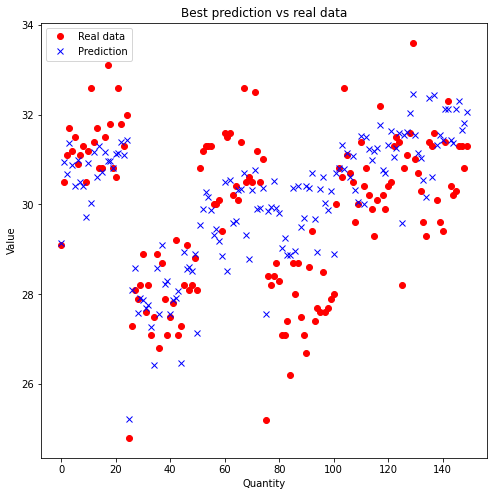

In [ ]:
plt.figure(figsize=(8,8))
quantidade = 150

plt.plot(range(y_hat[:quantidade,0].shape[0]), y_hat[:quantidade,0], 'ro', linewidth=2, label="Real data")
plt.plot(range(y_hat[:quantidade,0].shape[0]), scores_lrg['estimator'][2].predict(x_hat)[0:quantidade], 
         'bx', linewidth=2, label="Prediction")
plt.title('Best prediction vs real data')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.legend()


plt.show()

### Linear com regularização L2

Usaremos um modelo Ridge regression do sklearn para criar um modelo linear com regularização.
A regressão Ridge aborda alguns dos problemas dos Mínimos Quadrados Ordinários, impondo uma penalidade no tamanho dos coeficientes.

Este modelo resolve um modelo de regressão em que a função de perda é a função de mínimos quadrados lineares e a regularização é dada pela norma 12.

In [ ]:
alphas = np.power(10, np.random.uniform(low=-3, high=3, size=(10,)))
alphas.sort()

scores_ridge = []

for i, alpha in enumerate(alphas) :
  ridge = Ridge(alpha)
  scores_ridge.append(cross_validate(ridge, x_hat, y_hat, cv=5, scoring = 'neg_root_mean_squared_error', 
                        return_train_score =  True, return_estimator= True))
  print('Step {}: {}'.format(i, -scores_ridge[i]['test_score']))

Step 0: [1.45728787 1.63874812 1.45413022 1.6244106  1.71315372]
Step 1: [1.4572455  1.63878109 1.45413912 1.62437222 1.7131345 ]
Step 2: [1.45564824 1.64003883 1.4544839  1.62292558 1.7124185 ]
Step 3: [1.45452641 1.64093962 1.45473701 1.62190984 1.7119257 ]
Step 4: [1.451928   1.64308288 1.4553591  1.61955949 1.7108178 ]
Step 5: [1.44871005 1.64585113 1.45620173 1.61665752 1.70951488]
Step 6: [1.4177661  1.67983535 1.46923791 1.59176973 1.70201393]
Step 7: [1.41312143 1.68617533 1.47210921 1.58920484 1.70177885]
Step 8: [1.38961029 1.72411433 1.49187638 1.58830998 1.7040235 ]
Step 9: [1.38617168 1.73079495 1.49582589 1.59086635 1.70488751]


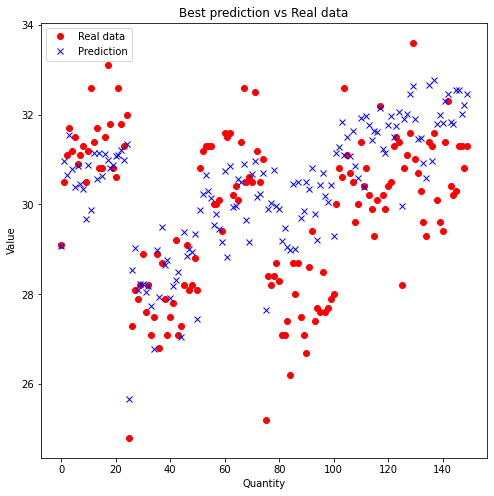

In [ ]:
plt.figure(figsize=(8,8))
quantidade = 150

plt.plot(range(y_hat[:quantidade,0].shape[0]), y_hat[:quantidade,0], 'ro', linewidth=2, label="Real data")
plt.plot(range(y_hat[:quantidade,0].shape[0]), scores_ridge[4]['estimator'][0].predict(x_hat)[0:quantidade], 
         'bx', linewidth=2, label="Prediction")
plt.title('Best prediction vs Real data')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.legend()


plt.show()

### Linear com regularização L1

Usaremos um modelo LassoCV regression do sklearn para criar um modelo linear com regularização. LassoCV é um modelo linear de Lasso com ajuste iterativo ao longo de um caminho de regularização. O melhor modelo é selecionado por validação cruzada

O Lasso é um modelo linear que estima coeficientes esparsos. É útil em alguns contextos devido à tendência de preferir soluções com menos coeficientes diferentes de zero, reduzindo efetivamente o número de recursos dos quais a solução dada é dependente.

A estimativa de Lasso, portanto, resolve a minimização da penalidade de mínimos quadrados, onde alfa é uma constante e o peso é a norma l1 do vetor de coeficientes.

In [ ]:
alphas = np.power(10, np.random.uniform(low=-3, high=3, size=(10,)))
alphas.sort()

scores_lasso = []

lasso = LassoCV(cv=5, alphas = alphas).fit(x_hat, y_hat)
y_pred = lasso.predict(x_hat)
mean_squared_error(y_hat, y_pred, squared=True)

2.1326735405310964

In [ ]:
alphas = np.power(10, np.random.uniform(low=-3, high=3, size=(10,)))
alphas.sort()

scores_lasso = []

for i, alpha in enumerate(alphas) :
  lasso = Lasso(alpha)
  scores_lasso.append(cross_validate(lasso, x_hat, y_hat, cv=5, scoring = 'neg_root_mean_squared_error', 
                        return_train_score =  True, return_estimator= True))
  print('Step {}: {}'.format(i, -scores_lasso[i]['test_score']))

Step 0: [1.45524761 1.63954347 1.45348063 1.62283895 1.71205179]
Step 1: [1.45380459 1.64020681 1.45306032 1.62175207 1.71129485]
Step 2: [1.45323097 1.64047442 1.45289787 1.62132496 1.71099871]
Step 3: [1.45187465 1.64115383 1.45249443 1.62029393 1.71028419]
Step 4: [1.42489183 1.65531262 1.45350997 1.60983369 1.69867013]
Step 5: [2.67754058 2.96770283 2.65592688 3.94030736 3.2712581 ]
Step 6: [2.67754058 2.96770283 2.65592688 3.94030736 3.2712581 ]
Step 7: [2.67754058 2.96770283 2.65592688 3.94030736 3.2712581 ]
Step 8: [2.67754058 2.96770283 2.65592688 3.94030736 3.2712581 ]
Step 9: [2.67754058 2.96770283 2.65592688 3.94030736 3.2712581 ]


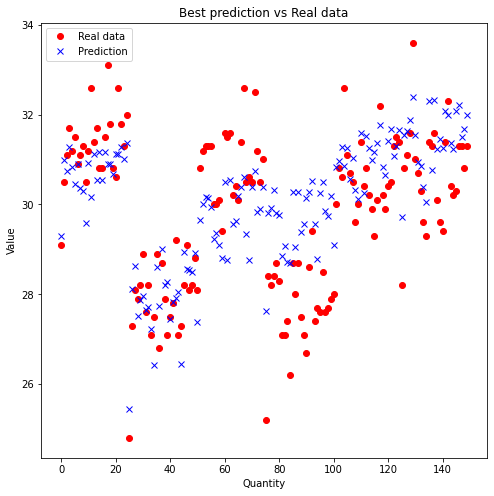

In [ ]:
plt.figure(figsize=(8,8))
quantidade = 150

plt.plot(range(y_hat[:quantidade,0].shape[0]), y_hat[:quantidade,0], 'ro', linewidth=2, label="Real data")
plt.plot(range(y_hat[:quantidade,0].shape[0]), scores_lasso[4]['estimator'][2].predict(x_hat)[0:quantidade], 
         'bx', linewidth=2, label="Prediction")
plt.title('Best prediction vs Real data')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.legend()


plt.show()

### SVM Linear

In [ ]:
epsilons = np.random.choice([0.1, 0.3], size=10)
Cs = np.power(2, np.random.uniform(low=-5, high=15, size=(10,)))

for C, epsilon in zip(epsilons, Cs):
  svm = SVR(kernel = 'linear', C = C, epsilon = epsilon)
  svm.fit(x_hat, y_hat)

In [ ]:
svm

SVR(C=0.3, cache_size=200, coef0=0.0, degree=3, epsilon=6.4973931360103805,
    gamma='scale', kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('Test score SVM: {}'.format(-scores_svm['test_score']))